In [1]:
# Import all lib

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="dark", color_codes=True, font_scale=1.5)
from sklearn.model_selection import train_test_split

### Load data

In [2]:
df = pd.read_excel("1645792390_cep1_dataset.xlsx")

# 1.	Preliminary analysis:

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.duplicated().sum()         # check for duplicate

1

In [6]:
df = df.drop_duplicates()      # drop duplicate

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Report

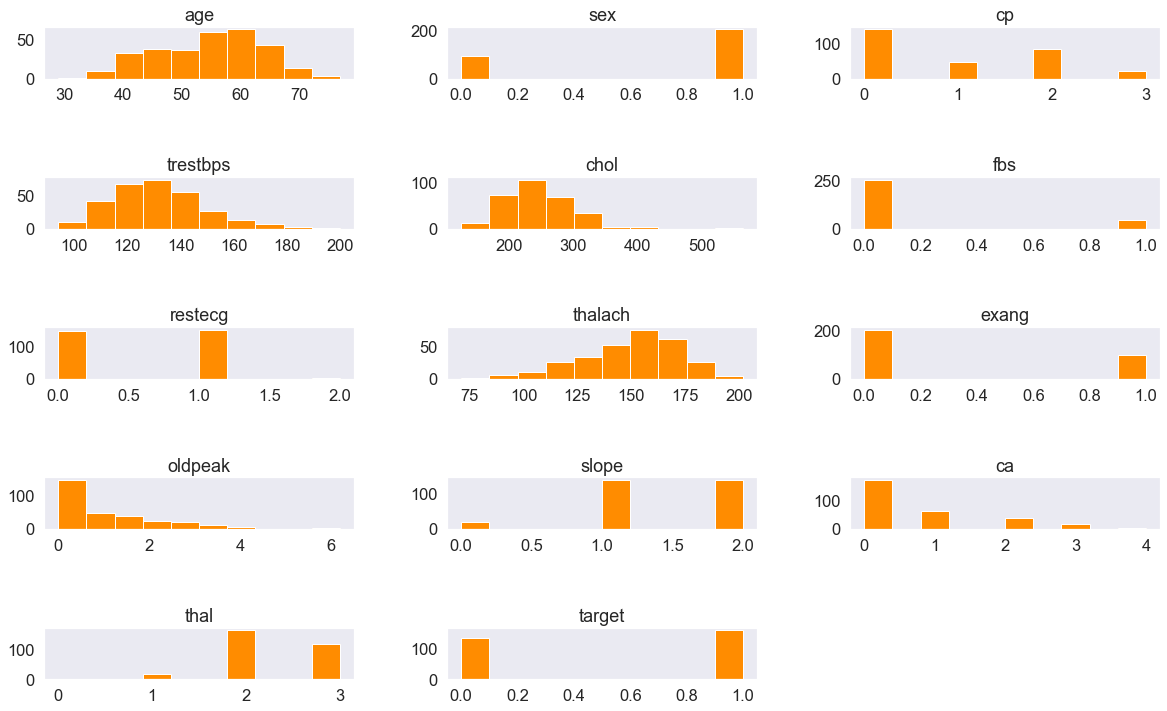

In [9]:
from matplotlib import style
plt.figure(figsize=(20,12))
plt.subplots_adjust( hspace=1.9, wspace=0.3)
plt.subplot(4,4,14)
i = 0                                                                     # distribution of columns   
for col in df:
    i+=1
    plt.subplot(5,3,i)
    plt.hist(df[col],color="darkorange")
    plt.title(col)
plt.show()

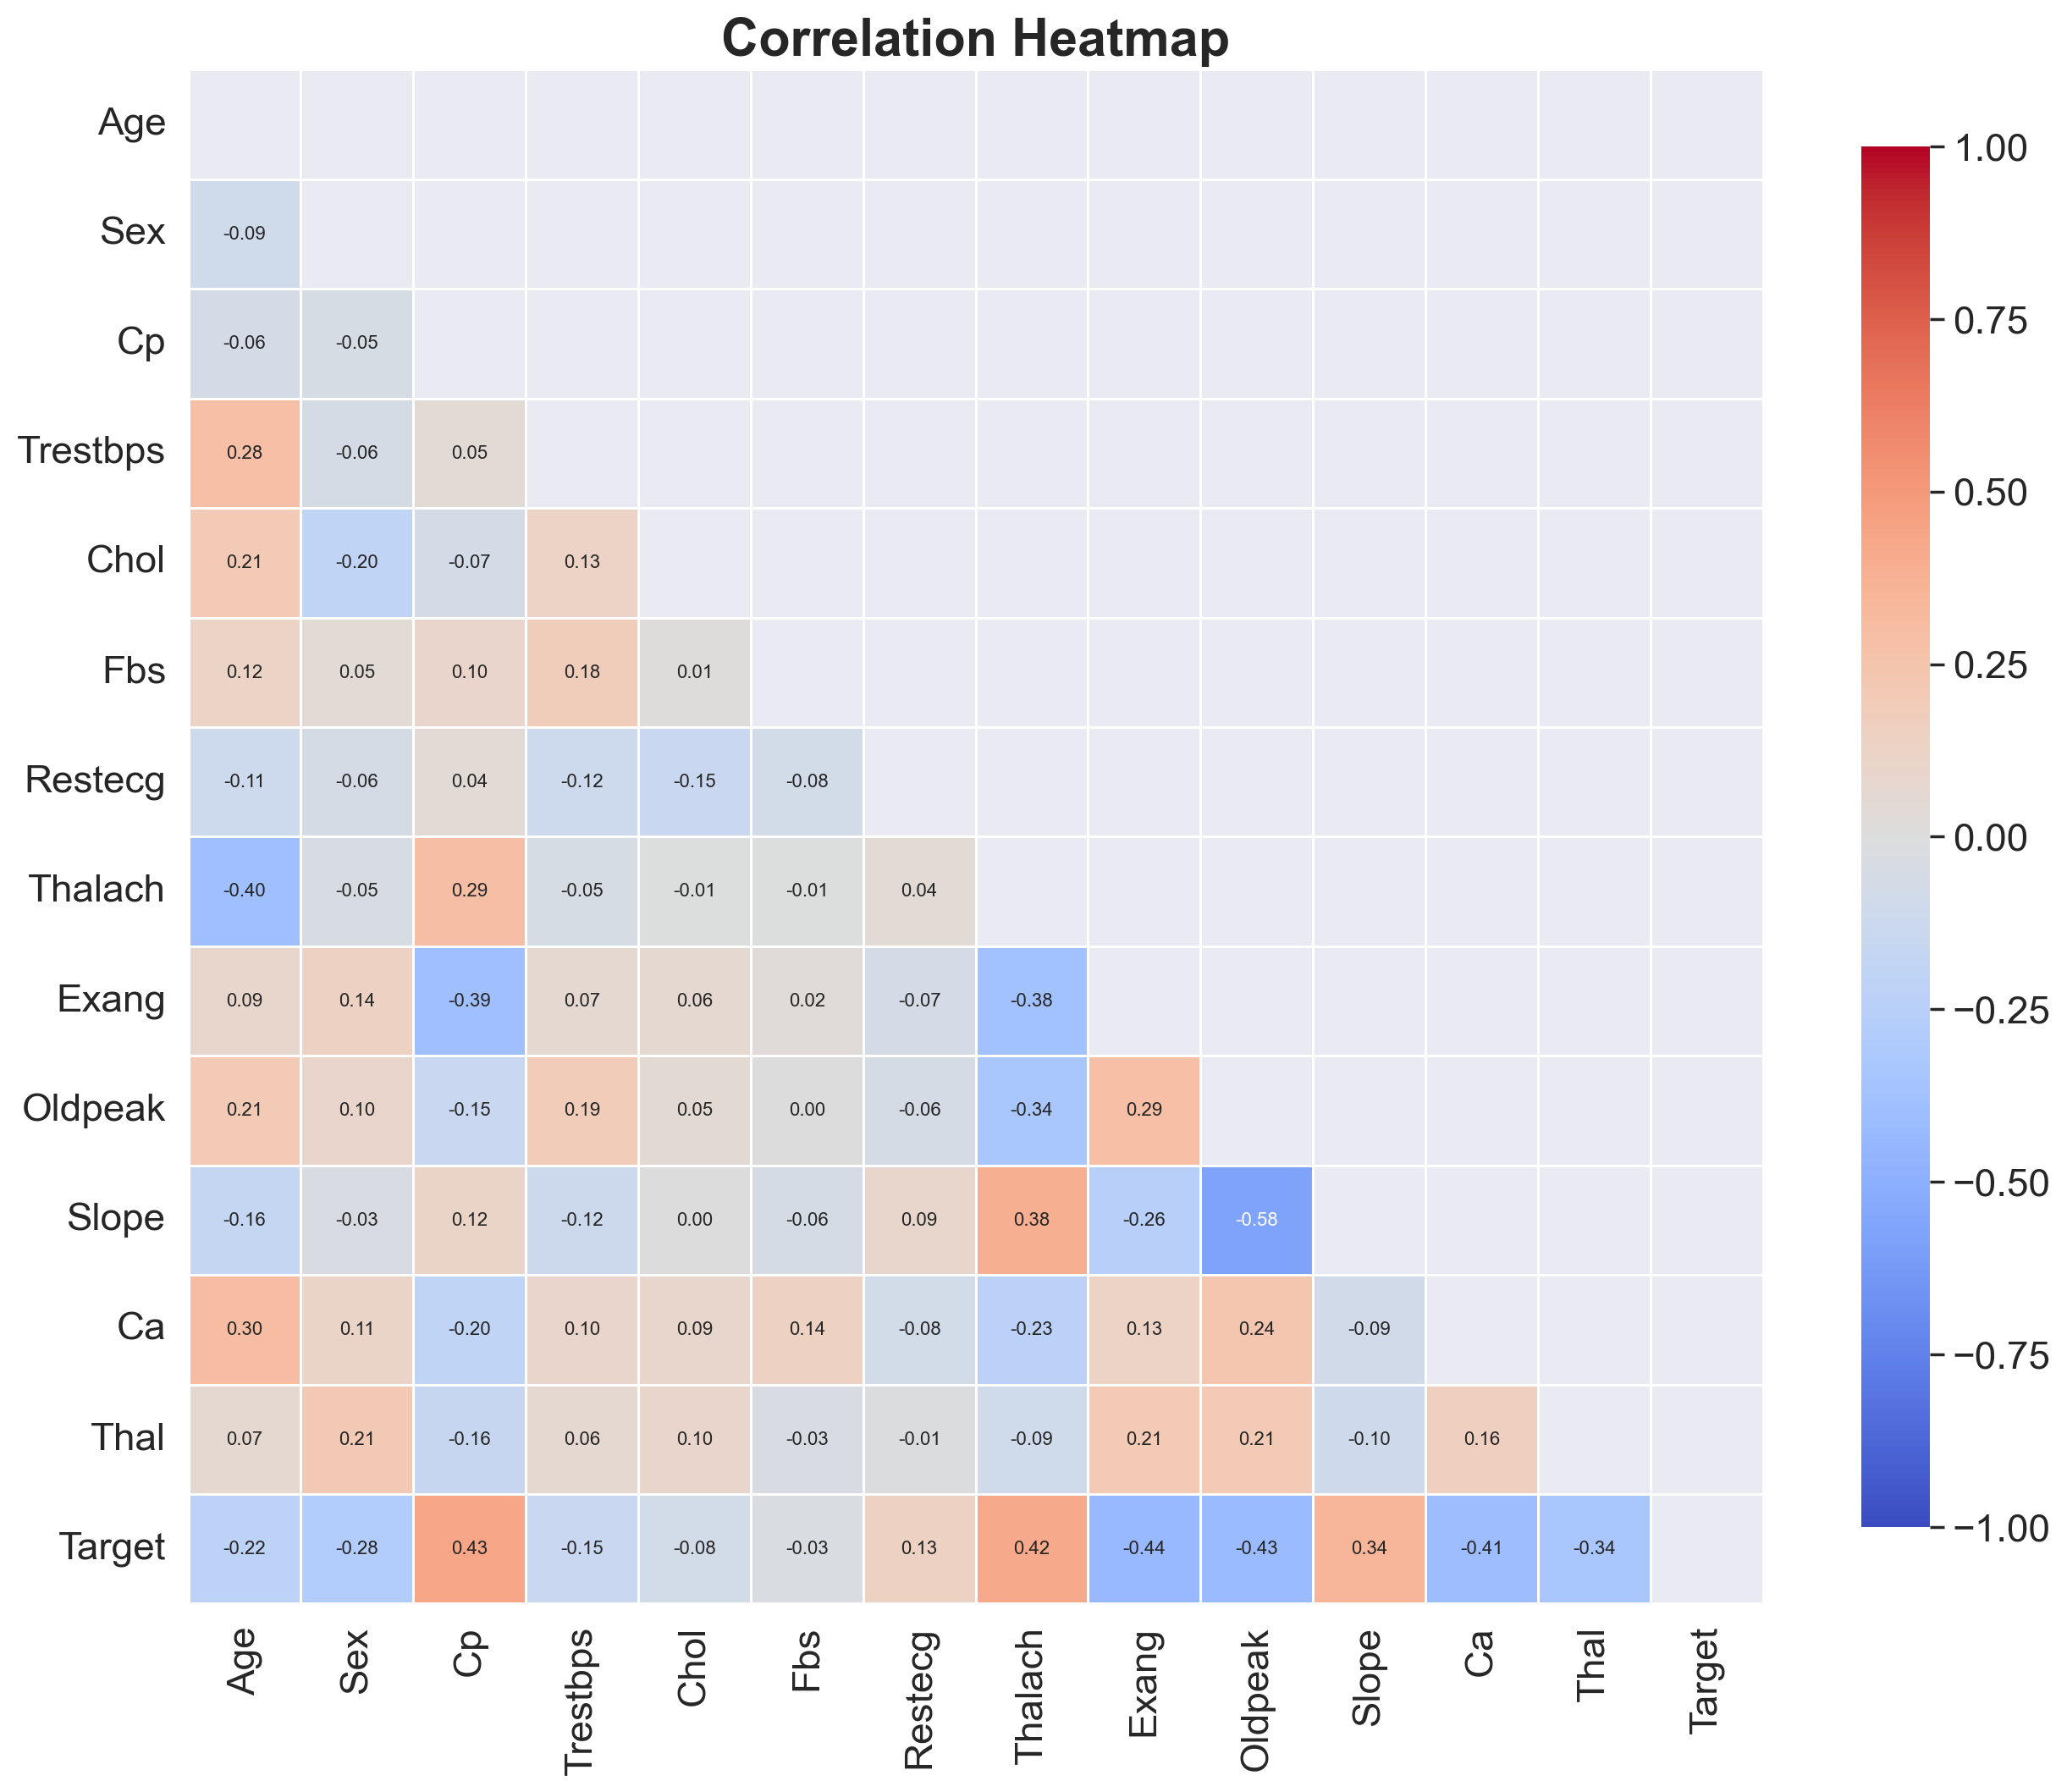

In [10]:
# correlation map 

data = df.corr()
fig, ax = plt.subplots(figsize=(15, 12), dpi= 200)

mask = np.triu(np.ones_like(data, dtype = bool))

cmap = sns.color_palette("coolwarm", as_cmap=True)

sns.heatmap(data = data, mask = mask, annot=True, fmt=".2f", cmap=cmap, linewidths= 1, 
            vmin=-1, vmax=1, cbar_kws={"shrink": .9}, annot_kws={"size":8})

yticks = [i.title() for i in data.index]
xticks = [i.title() for i in data.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
plt.title("Correlation Heatmap", fontsize=22, fontweight= "bold")
plt.show()

In [11]:
for col in df:
    print(col, " \n", df[col].unique(),"\n")         # Unique value in each row

age  
 [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77] 

sex  
 [1 0] 

cp  
 [3 2 1 0] 

trestbps  
 [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 

chol  
 [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 2

In [12]:
categorical_val = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"] #categorical columns

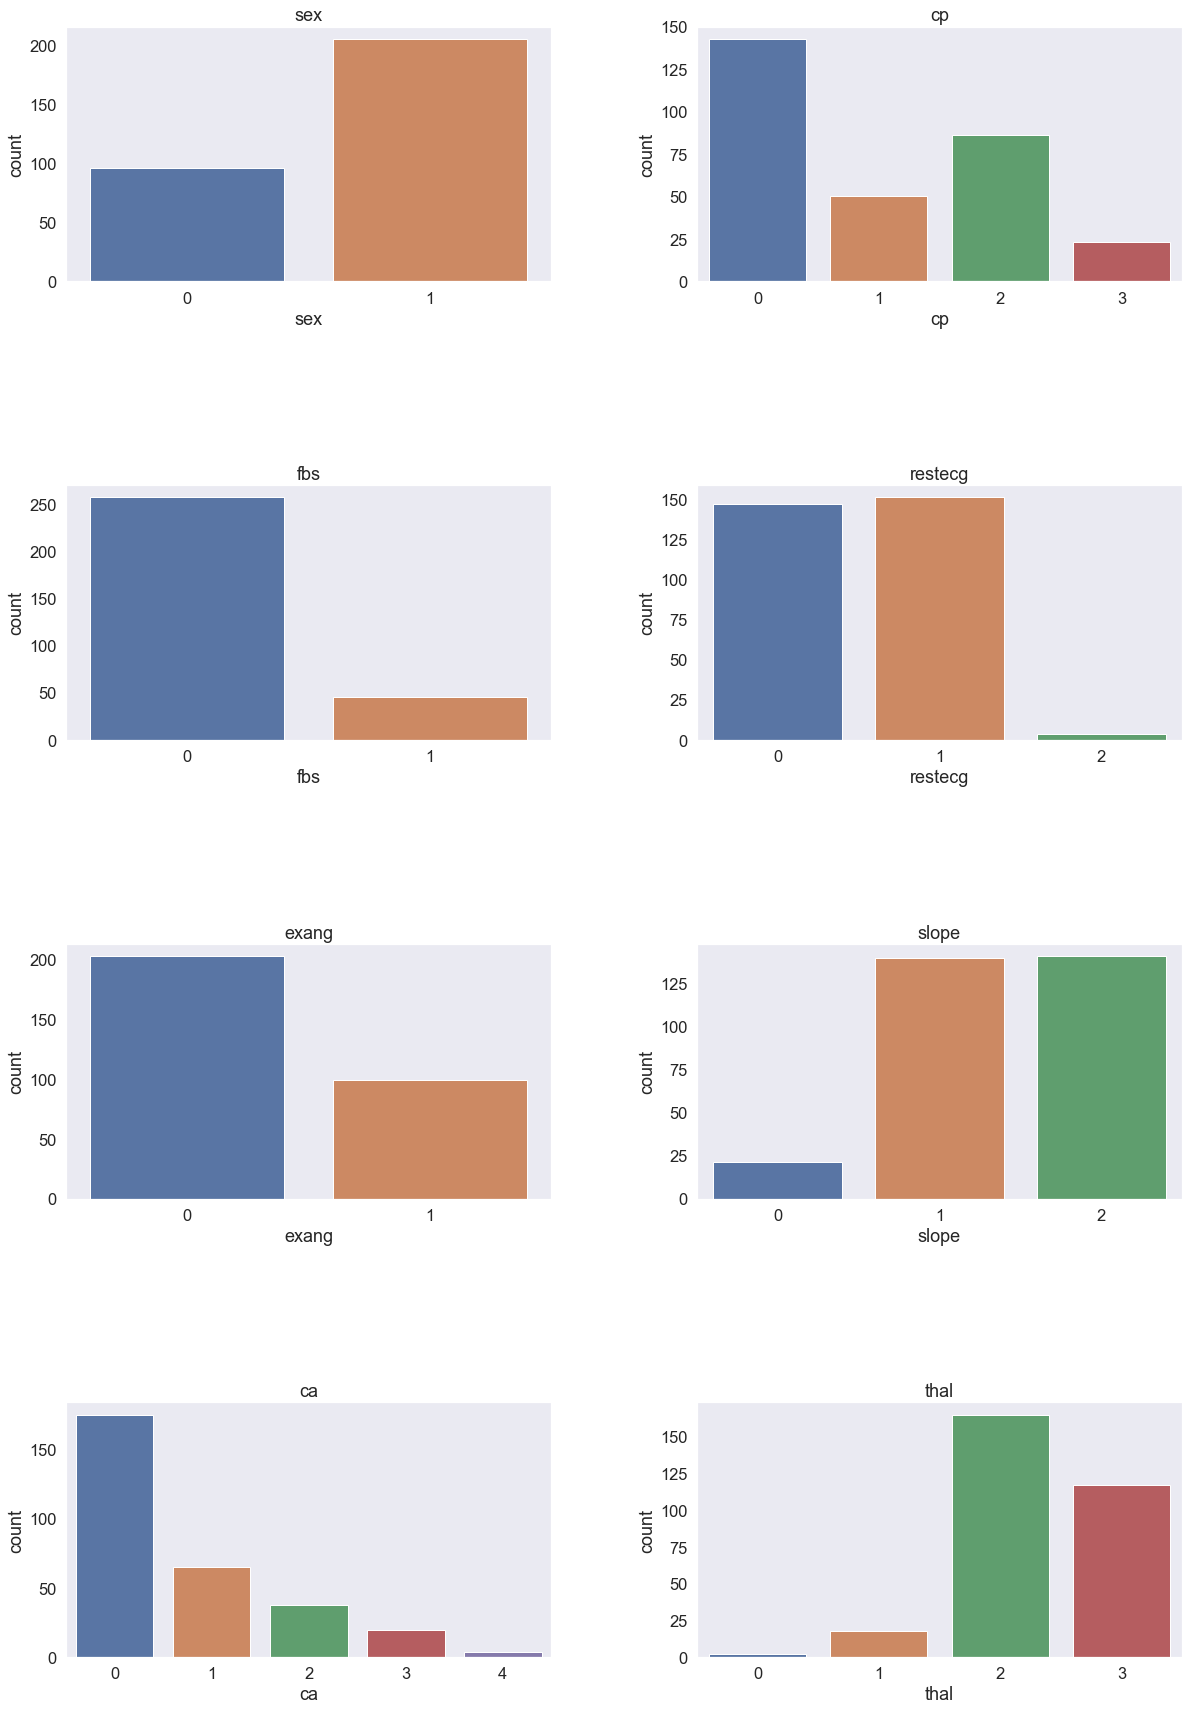

In [13]:
from matplotlib import style
plt.figure(figsize=(20,30))
plt.subplots_adjust( hspace=0.8, wspace=0.3)
plt.subplot(4,2,8)
i = 0                                                                     # distribution of columns   
for col in categorical_val:
    i+=1
    plt.subplot(4,2,i)
    ax = sns.countplot(x=col, data=df)
    plt.title(col)
plt.show()

### Through this plot we can see that the column "restecg", "ca" and "thal" have low count catogary 

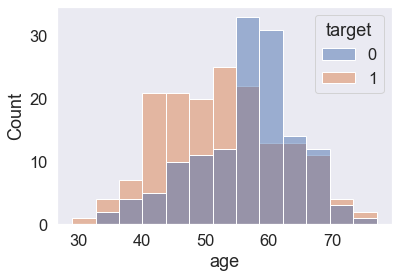

In [14]:
sns.histplot(data = df, x= "age", hue="target",color="darkorange")
plt.show()

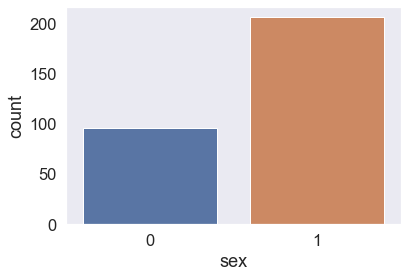

In [15]:
sns.countplot(data= df,x= "sex")
plt.show()

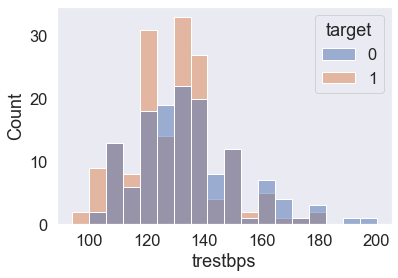

In [16]:
sns.histplot(data = df, x= "trestbps", hue="target",color="darkorange")
plt.show()

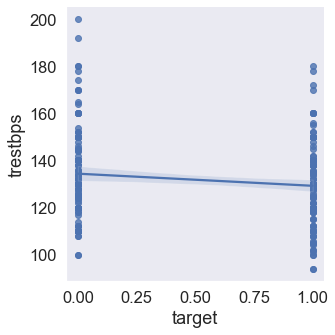

In [17]:
sns.lmplot(y='trestbps',x='target',data=df,fit_reg=True)
plt.show()

### Through above pllot its clear that based on anomalies in the resting blood pressure (trestbps) of a patient we can't detect CVD

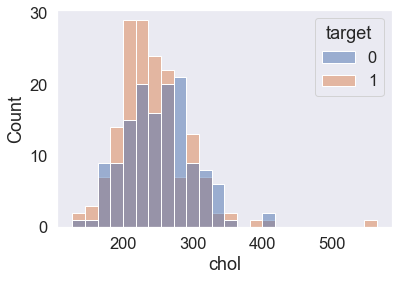

In [18]:
sns.histplot(data = df, x= "chol", hue="target",color="darkorange")
plt.show()

### If cholesterol levels is grater than 500 then the patient have very high chance to be CVD patient

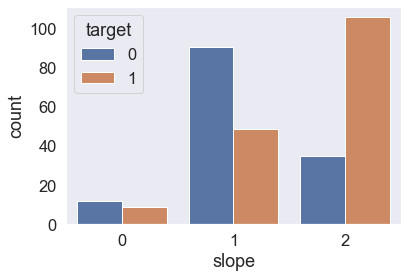

In [19]:
sns.countplot(data = df, x= "slope", hue="target")
plt.show()

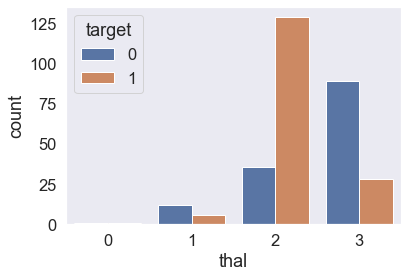

In [20]:
sns.countplot(data = df, x= "thal", hue="target")
plt.show()

### Thalassemia type "fixed defect" is a major cause of CVD

<Figure size 5040x5040 with 0 Axes>

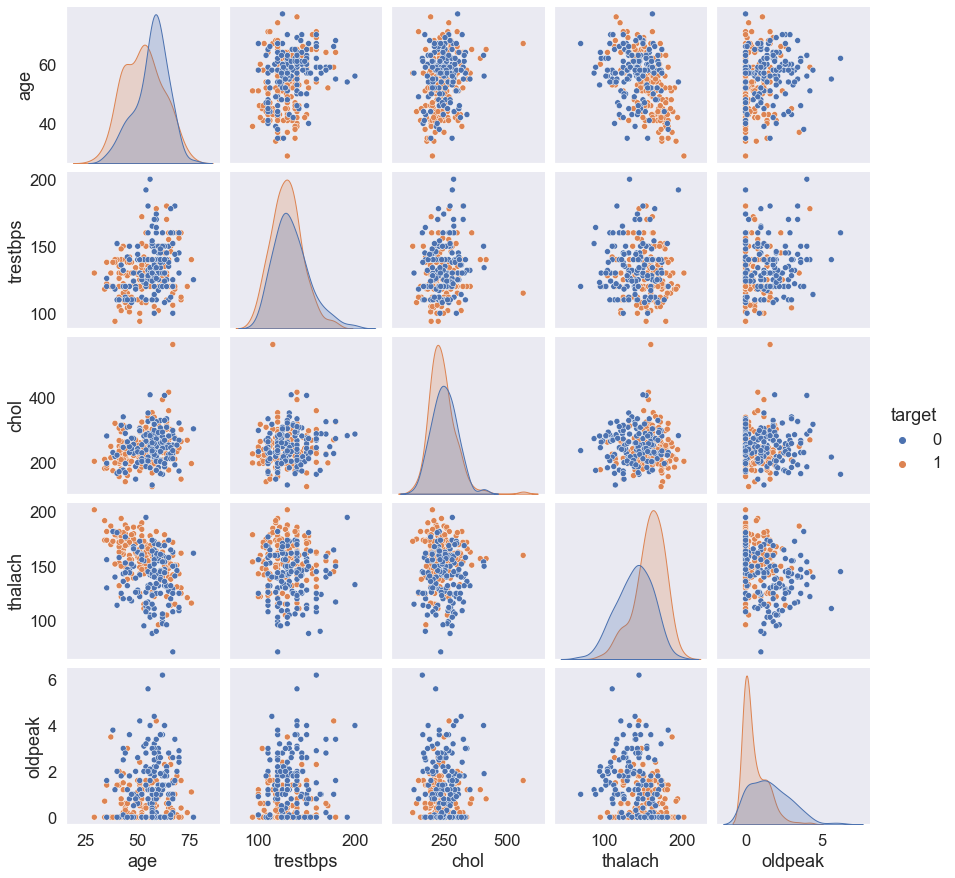

In [21]:
fig = plt.figure(figsize=(70,70))
sns.pairplot(df.drop(["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"], axis = 1), hue='target')
plt.show()

#### 1. Higher thalach and lower age have higer probability of being CV patient
#### 2. Lower age and lower chol is also have significant chance of being cv patient

# 3.	Baseline model to predict the risk of a heart attack

## data preparation

In [22]:
df["restecg"].value_counts()

1    151
0    147
2      4
Name: restecg, dtype: int64

In [23]:
df = df[df.restecg != 2]         # value 2 is too low for building a model so I del it

In [24]:
df["restecg"].value_counts()

1    151
0    147
Name: restecg, dtype: int64

In [25]:
df["ca"].value_counts()

0    173
1     64
2     38
3     19
4      4
Name: ca, dtype: int64

In [26]:
df = df[df.ca != 4]

In [27]:
#df.loc[df["ca"]==3] = 2

In [28]:
df["ca"].value_counts()

0    173
1     64
2     38
3     19
Name: ca, dtype: int64

In [29]:
df["thal"].value_counts()

2    161
3    114
1     17
0      2
Name: thal, dtype: int64

In [30]:
df = df[df.thal != 0]
#df = df[df.thal != 1]

In [31]:
df["thal"].value_counts()

2    161
3    114
1     17
Name: thal, dtype: int64

In [32]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [33]:
#One hot encoding in all calogorical col
df = pd.get_dummies(df, columns = ["sex","cp","fbs","restecg","exang","slope","ca","thal"]) 

In [34]:
X = df.drop("target", axis = 1)
Y = df["target"]

In [35]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=20)

In [36]:
x_train

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
109,50,110,254,159,0.0,1,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
104,50,129,196,163,0.0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
60,71,110,265,130,0.0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
90,48,124,255,175,0.0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
299,45,110,264,132,1.2,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,29,130,204,202,0.0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
287,57,154,232,164,0.0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
224,54,110,239,126,2.8,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
229,64,125,309,131,1.8,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,1


In [37]:
y_train

109    1
104    1
60     1
90     1
299    0
      ..
72     1
287    0
224    0
229    0
279    0
Name: target, Length: 219, dtype: int64

In [38]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train) #Normalize the data set
x_test = sc.fit_transform(x_test)

# Logistic Regression

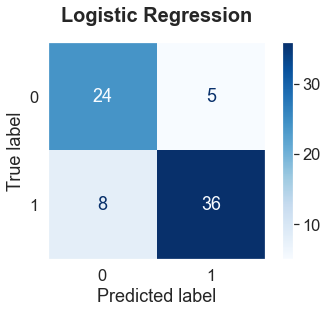

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regr,0.821918,0.878049,0.818182,0.847059


In [39]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

results_df = pd.DataFrame(
    data=[["Logistic Regr", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

cm = confusion_matrix(y_test, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Logistic Regression", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.88      0.82      0.85        44

    accuracy                           0.82        73
   macro avg       0.81      0.82      0.82        73
weighted avg       0.83      0.82      0.82        73



## Hyper Parameter tunning

In [41]:
le= LogisticRegression()

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

letu= RandomizedSearchCV(estimator= le, param_distributions= param_grid, scoring= "accuracy", n_iter=500)

letu.fit(x_train, y_train)

C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

RandomizedSearchCV(estimator=LogisticRegression(), n_iter=500,
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [100, 1000, 2500, 5000],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'liblinear', 'sag',
                                                    'saga']}],
                   scoring='accuracy')

In [42]:
letu.best_params_

{'solver': 'lbfgs',
 'penalty': 'l2',
 'max_iter': 100,
 'C': 0.0018329807108324356}

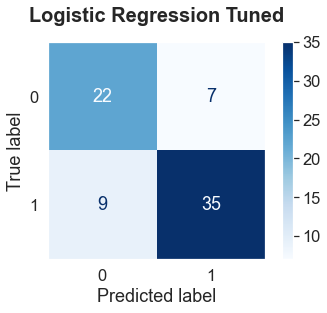

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regr,0.821918,0.878049,0.818182,0.847059
1,Logistic Regr Tuned,0.780822,0.833333,0.795455,0.813953


In [43]:
y_pred = letu.predict(x_test)

results_df_2 = pd.DataFrame(
    data=[["Logistic Regr Tuned", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = results_df.append(results_df_2, ignore_index=True)

cm = confusion_matrix(y_test, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Logistic Regression Tuned", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df

# Random Forest

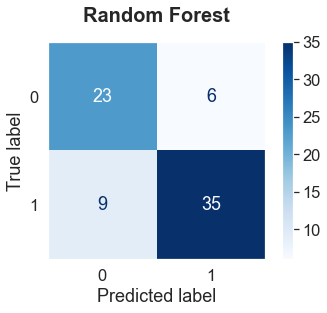

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regr,0.821918,0.878049,0.818182,0.847059
1,Logistic Regr Tuned,0.780822,0.833333,0.795455,0.813953
2,Random Forest,0.794521,0.853659,0.795455,0.823529


In [44]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train)

y_pred= rf.predict(x_test)

results_df_2 = pd.DataFrame(
    data=[["Random Forest", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = results_df.append(results_df_2, ignore_index=True)

cm = confusion_matrix(y_test, y_pred)
disp_rf= ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_rf.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Random Forest", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df

## Hyper parameter tunning

In [45]:
param_rf = {

"bootstrap": [True],

"max_depth": [5, 8, 10, 20, 30, 40, 50, None],

"max_features": ["auto", "sqrt"],

"min_samples_leaf": [1, 2, 4],

"min_samples_split": [1, 2, 5, 10],

"n_estimators": [50, 100, 200, 400, 600, 800, 1000]

}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_rf, n_iter = 500, verbose=1, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


C:\Users\subha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
660 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
660 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\subha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\subha\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\subha\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\subha\anaconda3\lib\site-package

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=500, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 8, 10, 20, 30, 40, 50,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [1, 2, 5, 10],
                                        'n_estimators': [50, 100, 200, 400, 600,
                                                         800, 1000]},
                   random_state=42, verbose=1)

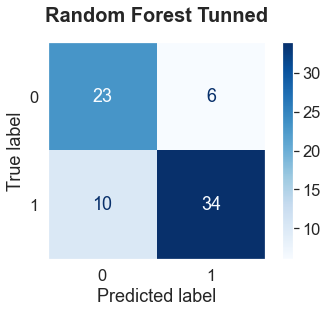

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regr,0.821918,0.878049,0.818182,0.847059
1,Logistic Regr Tuned,0.780822,0.833333,0.795455,0.813953
2,Random Forest,0.794521,0.853659,0.795455,0.823529
3,Random Forest Tunned,0.780822,0.850000,0.772727,0.809524


In [46]:
y_pred= rf_random.predict(x_test)

results_df_2 = pd.DataFrame(
    data=[["Random Forest Tunned", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = results_df.append(results_df_2, ignore_index=True)

cm = confusion_matrix(y_test, y_pred)
disp_rf= ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_rf.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Random Forest Tunned", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df